## Python in Data Science

## Steps

1. Data Import (Read)
2. Columns Analyze
3. Duplicate Values Removal
4. Null Values Removal
5. Normalization
6. Outliners Exclude
7. Model Train
8. Data Visualize


## Libraries

1. Numpy (Computation)
2. Pandas (DataFrames)
3. Matplot (Plottiing Graphs)
4. Seaborn (Plottiing Graphs)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [5]:
#Null Values Removal
data.dropna(inplace=True)

#Duplicates Removal
data.drop_duplicates(inplace=True)

#Normalization / Scaling / Transformation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Electric Range'] = scaler.fit_transform(data['Electric Range'].values.reshape(-1 , 1))


In [6]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.975961,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,-0.445458,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,-0.445458,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.529090,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,0.302792,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [8]:
data['Electric Range'].min()

-0.7052666777867044

In [10]:
# Outliners Exclude
from scipy import stats
z_score = stats.zscore(data['Electric Range'])
data = data[(z_score < 3)]

In [11]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.975961,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,-0.445458,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,-0.445458,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,1.529090,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,0.302792,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150137 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150137 non-null  object 
 1   County                                             150137 non-null  object 
 2   City                                               150137 non-null  object 
 3   State                                              150137 non-null  object 
 4   Postal Code                                        150137 non-null  float64
 5   Model Year                                         150137 non-null  int64  
 6   Make                                               150137 non-null  object 
 7   Model                                              150137 non-null  object 
 8   Electric Vehicle Type                              150137 non-null  object

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

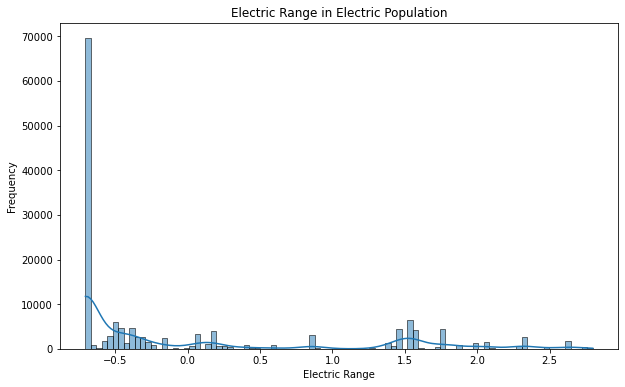

In [14]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(data['Electric Range'], kde=True)
plt.title('Electric Range in Electric Population')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

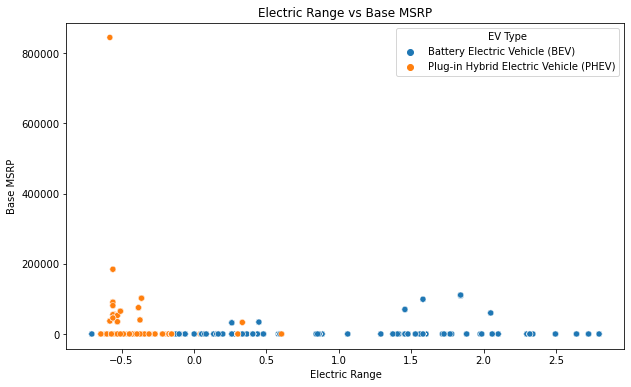

In [17]:
# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=data , x='Electric Range' , y='Base MSRP' , hue='Electric Vehicle Type')
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.legend(title='EV Type')
plt.show()

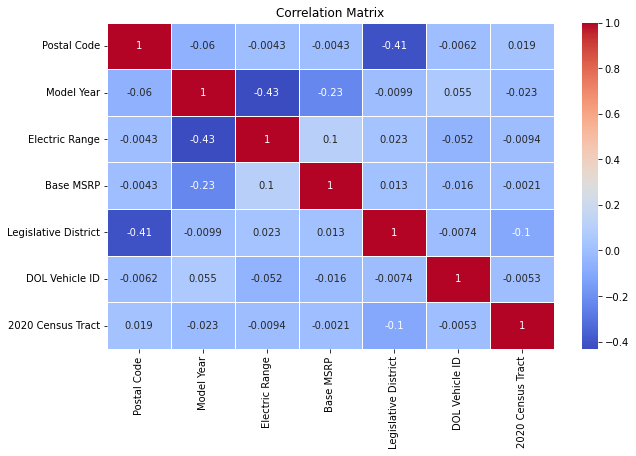

In [18]:
plt.figure(figsize=(10,6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix , annot=True , cmap='coolwarm' , linewidths=-0.5)
plt.title('Correlation Matrix')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['Electric Range']]
Y = data['Base MSRP']

#Spliting data
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

model = LinearRegression()

model.fit(X_train , Y_train)

y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(Y_test , y_pred)
print(f"Mean Squared Value : {mse}")

Mean Squared Value : 76567378.09722193


# Case Study

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

C:\Users\lapto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230.0,3.0,Southwest,377.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330.0,1.0,Central,163.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200.0,1.0,Central,155.0,2.0,845.0,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730.0,15.0,N Hollywood,1543.0,2.0,745.0,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415.0,19.0,Mission,1998.0,2.0,740.0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471019 entries, 0 to 471018
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           471019 non-null  object 
 1   Date Rptd       471016 non-null  object 
 2   DATE OCC        471016 non-null  object 
 3   TIME OCC        471016 non-null  float64
 4   AREA            471016 non-null  float64
 5   AREA NAME       471016 non-null  object 
 6   Rpt Dist No     471016 non-null  float64
 7   Part 1-2        471016 non-null  float64
 8   Crm Cd          471016 non-null  float64
 9   Crm Cd Desc     471016 non-null  object 
 10  Mocodes         406087 non-null  object 
 11  Vict Age        471015 non-null  float64
 12  Vict Sex        409197 non-null  object 
 13  Vict Descent    409194 non-null  object 
 14  Premis Cd       471010 non-null  float64
 15  Premis Desc     470816 non-null  object 
 16  Weapon Used Cd  167256 non-null  float64
 17  Weapon Des

In [35]:
df.describe()

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,471016.000000,471016.000000,471016.000000,471016.000000,471016.000000,471015.000000,471010.000000,167256.000000,471010.000000,36744.000000,1257.000000,36.000000,471015.000000,471015.000000
mean,1343.358387,10.776608,1123.946821,1.415534,504.765252,30.052754,300.498193,362.112707,504.496234,954.371326,982.670644,988.777778,33.910020,-117.787110
std,652.116276,6.061025,606.166292,0.492814,209.207011,21.703417,215.224574,123.437229,208.997358,115.914000,53.858047,34.073963,2.356693,8.177453
min,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,900.000000,6.000000,628.000000,1.000000,330.000000,12.000000,101.000000,308.000000,330.000000,998.000000,998.000000,998.000000,34.011000,-118.430500
50%,1425.000000,11.000000,1145.000000,1.000000,480.000000,31.000000,203.000000,400.000000,480.000000,998.000000,998.000000,998.000000,34.058300,-118.322500
75%,1900.000000,16.000000,1621.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163800,-118.274000
max,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [36]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [37]:
df = pd.get_dummies(df , columns=['Vict Sex' , 'Vict Descent'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 52074 to 371637
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           4 non-null      object 
 1   Date Rptd       4 non-null      object 
 2   DATE OCC        4 non-null      object 
 3   TIME OCC        4 non-null      float64
 4   AREA            4 non-null      float64
 5   AREA NAME       4 non-null      object 
 6   Rpt Dist No     4 non-null      float64
 7   Part 1-2        4 non-null      float64
 8   Crm Cd          4 non-null      float64
 9   Crm Cd Desc     4 non-null      object 
 10  Mocodes         4 non-null      object 
 11  Vict Age        4 non-null      float64
 12  Premis Cd       4 non-null      float64
 13  Premis Desc     4 non-null      object 
 14  Weapon Used Cd  4 non-null      float64
 15  Weapon Desc     4 non-null      object 
 16  Status          4 non-null      object 
 17  Status Desc     4 non-null    

In [39]:
df.describe()

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,Vict Sex_F,Vict Sex_M,Vict Descent_H
count,4.000000,4.000000,4.000000,4.0,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.0,4.000000,4.000000,4.00000,4.00000,4.0
mean,1586.250000,8.250000,879.750000,1.0,463.25000,44.250000,255.000000,279.250000,463.25000,642.500000,936.750000,998.0,34.132575,-118.334700,0.50000,0.50000,1.0
std,907.334696,7.410578,718.727289,0.0,345.72665,10.563301,303.351282,147.248939,345.72665,348.460902,41.258332,0.0,0.110084,0.083132,0.57735,0.57735,0.0
min,230.000000,2.000000,279.000000,1.0,121.00000,34.000000,101.000000,200.000000,121.00000,210.000000,910.000000,998.0,34.050300,-118.457100,0.00000,0.00000,1.0
25%,1520.000000,5.000000,562.500000,1.0,187.75000,39.250000,101.000000,203.750000,187.75000,435.000000,910.000000,998.0,34.078950,-118.346175,0.00000,0.00000,1.0
50%,1990.000000,6.000000,658.000000,1.0,485.50000,42.000000,104.500000,208.500000,485.50000,715.000000,920.000000,998.0,34.092550,-118.304850,0.50000,0.50000,1.0
75%,2056.250000,9.250000,975.250000,1.0,761.00000,47.000000,258.500000,284.000000,761.00000,922.500000,946.750000,998.0,34.146175,-118.293375,1.00000,1.00000,1.0
max,2135.000000,19.000000,1924.000000,1.0,761.00000,59.000000,710.000000,500.000000,761.00000,930.000000,997.000000,998.0,34.294900,-118.272000,1.00000,1.00000,1.0


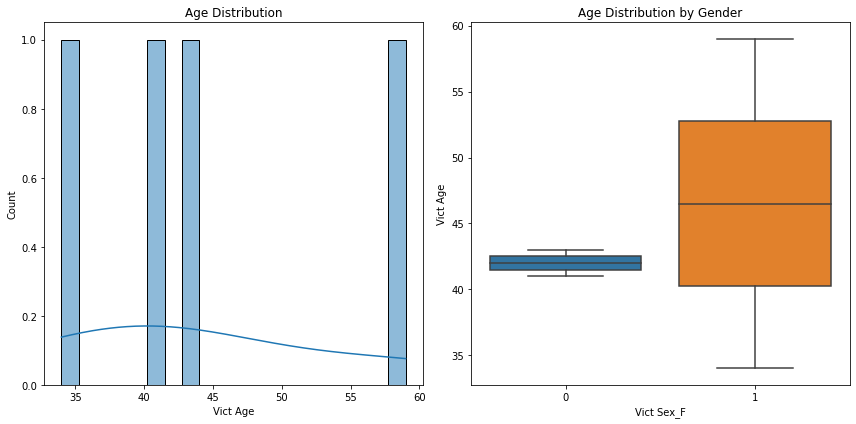

In [42]:
plt.figure# Data distribution (histograms, box plots)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Vict Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='Vict Sex_F', y='Vict Age', data=df)
plt.title('Age Distribution by Gender')
plt.tight_layout()
plt.show()

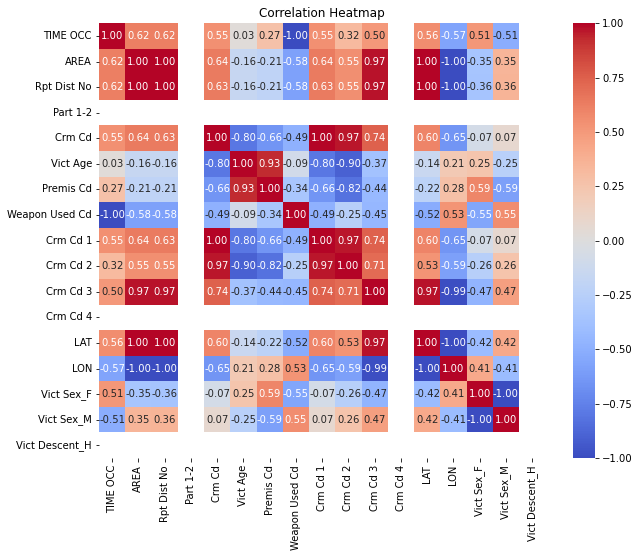

In [43]:
# Correlation analysis (heatmaps)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

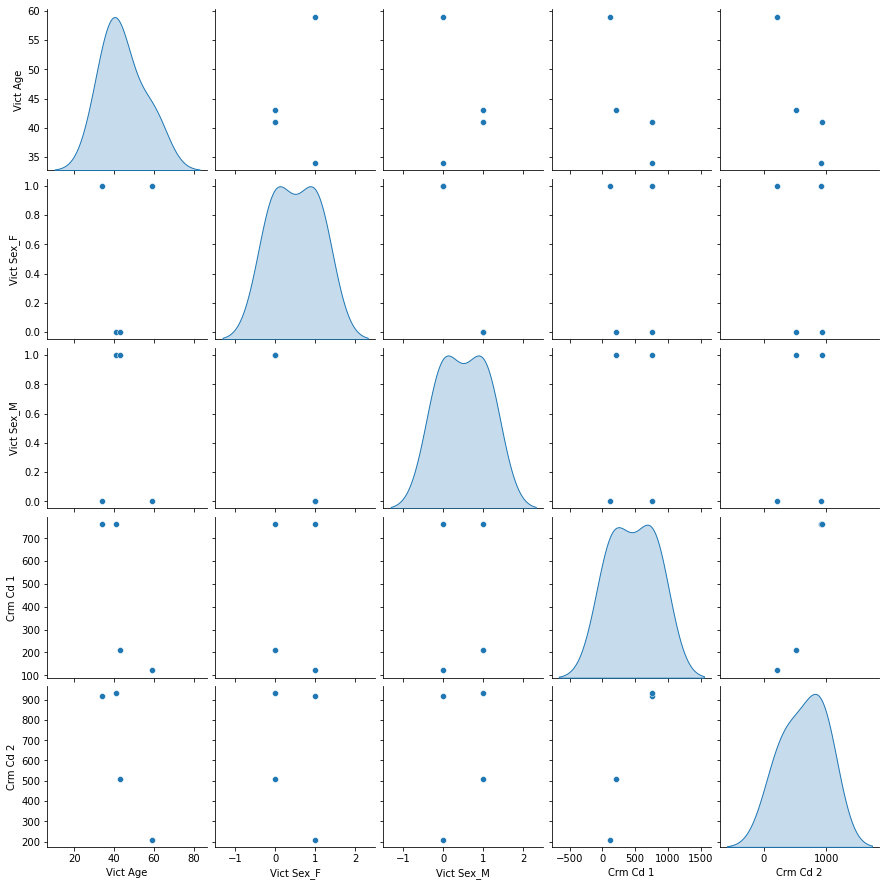

In [44]:
# Scatter plots and pair plots for feature relationships
sns.pairplot(df[['Vict Age', 'Vict Sex_F', 'Vict Sex_M', 'Crm Cd 1', 'Crm Cd 2']], diag_kind='kde')
plt.show()

In [46]:
X = df[['Vict Age', 'Vict Sex_F', 'Vict Sex_M']]
y = df['Crm Cd 1']

In [47]:
X_train , X_test , y_train  , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [51]:
mse = mean_squared_error(y_test , y_pred)
print(f"Mean Squared Error : {mse}")

Mean Squared Error : 249800.03999999972


In [52]:
print("Model Results")
print("Intercept: " , model.intercept_)

Model Results
Intercept:  1471.1000000000001


In [53]:
print("Coefficient: " , model.coef_)

Coefficient:  [ -25.6  160.3 -160.3]
